In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./netflix_titles.csv')
df.head()
import warnings
warnings.filterwarnings('ignore')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.shape

(8807, 12)

In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df2 = df.dropna().copy()

In [7]:
df2.shape

(5332, 12)

### Data transformation

#### deleting 's' in show_id values

In [8]:
show_id = df2['show_id'].copy()
show_id.head()

7      s8
8      s9
9     s10
12    s13
24    s25
Name: show_id, dtype: object

In [9]:
for i in show_id.index:
    sep = [*show_id[i]]
    sep.remove('s')
    join = ''
    for x in sep:
        join+=x
    show_id[i] = join

In [10]:
show_id.astype('int')
df2['show_id'] = show_id.copy()

#### separating month and year from date_added

In [11]:
# separating moth from date_added
date_added = df2['date_added'].copy()
month_added = pd.DataFrame(index = df2.index, columns = ['month_added'])
year_added = pd.DataFrame(index = df2.index, columns = ['year_added'])

for i in date_added.index:
        sep = date_added[i]
        sep2 = sep.split()
        month_added.loc[i] = sep2[0]
        year_added.loc[i] = sep2[-1]

In [101]:
df2 = df2.join([month_added, year_added])
#df2.head()

In [13]:
df2.drop('date_added', axis = 1, inplace = True)

#### I'm going to extract all movies genres to make a column for each row within the data set

In [14]:
movies_gen = df2['listed_in'].copy()

In [15]:
ge = []
for i in movies_gen.index:
    genres = movies_gen.loc[i]
    ge+= genres.split(", ")

ge =list(set(ge))

In [102]:
c = pd.DataFrame(index = df2.index, columns= [g+' Genre' for g in ge]).fillna(0)   
#c.head()

In [103]:
for g in c.columns:
    df2[g] = c[g]
# df2.head()

In [18]:
for i in df2.index:
    for x in [df2['listed_in'].loc[i]]:
        x2 = x.split(", ")
        for y in x2:
            df2[y+' Genre'].loc[i] = 1

In [19]:
df2.drop('listed_in', axis = 1, inplace = True)

In [20]:
df2.groupby('release_year')[[g+ ' Genre' for g in ge]].sum()

,Spanish-Language TV Shows Genre,Kids' TV Genre,Independent Movies Genre,Crime TV Shows Genre,TV Thrillers Genre,International Movies Genre,TV Shows Genre,TV Mysteries Genre,Anime Features Genre,LGBTQ Movies Genre,...,TV Horror Genre,Comedies Genre,International TV Shows Genre,Stand-Up Comedy & Talk Shows Genre,Classic & Cult TV Genre,TV Action & Adventure Genre,TV Dramas Genre,TV Sci-Fi & Fantasy Genre,Classic Movies Genre,Sports Movies Genre
release_year,,,,,,,,,,,,,,,,,,,,,
1942,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1944,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1945,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1946,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1947,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017,0,5,113,3,0,282,1,0,6,12,...,0,157,6,4,0,0,4,0,0,18
2018,0,1,127,3,0,294,0,0,8,11,...,2,165,11,2,0,1,7,0,1,20
2019,2,2,74,11,1,230,1,2,5,12,...,1,134,12,1,1,6,11,1,0,18


To display in a better way this table i'll create ranges of years

In [21]:
#years = pd.interval_range(start = df2['release_year'].min(), end = df2['release_year'].max() + 1, freq = 10, closed = 'left')
years = pd.cut(df2['release_year'], bins = 8, right = False, precision = 0)
#years.head()

In [22]:
ct = df2.groupby(years)[[g + ' Genre' for g in ge]].sum()
ct

,Spanish-Language TV Shows Genre,Kids' TV Genre,Independent Movies Genre,Crime TV Shows Genre,TV Thrillers Genre,International Movies Genre,TV Shows Genre,TV Mysteries Genre,Anime Features Genre,LGBTQ Movies Genre,...,TV Horror Genre,Comedies Genre,International TV Shows Genre,Stand-Up Comedy & Talk Shows Genre,Classic & Cult TV Genre,TV Action & Adventure Genre,TV Dramas Genre,TV Sci-Fi & Fantasy Genre,Classic Movies Genre,Sports Movies Genre
release_year,,,,,,,,,,,,,,,,,,,,,
"[1942.0, 1952.0)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,0
"[1952.0, 1962.0)",0,0,2,0,0,5,0,0,0,0,...,0,6,0,0,0,0,0,0,13,0
"[1962.0, 1972.0)",0,0,1,0,0,10,0,0,0,0,...,0,4,0,0,0,0,0,0,20,0
"[1972.0, 1982.0)",0,0,5,0,0,32,0,0,1,0,...,0,23,0,0,0,0,0,0,33,3
"[1982.0, 1991.0)",0,0,13,0,0,44,0,0,0,0,...,0,32,0,0,0,0,0,0,20,7
"[1991.0, 2001.0)",0,0,17,0,0,78,0,0,3,3,...,0,108,1,0,0,0,0,0,16,4
"[2001.0, 2011.0)",0,1,75,0,0,378,0,0,19,5,...,0,327,5,0,0,0,0,0,0,26
"[2011.0, 2021.0)",10,12,627,38,3,1822,5,8,38,72,...,7,1053,81,11,3,13,52,4,1,116


#### creating a new data frame with the information of the table above

In [23]:
df3 = pd.DataFrame(ct)

#### Now we want to obtain the percentage of movies per genre for each range of years.

First we have to know how many movies we have per years

In [24]:
total = pd.DataFrame(df3.sum(axis = 1))
df3['Total'] = total.copy()

we have the of movies per years, know we are going to divide it by the number of movies per genre

In [25]:
for i in df3.columns:
    result = df3[i]/df3['Total']
    df3[i] = result.copy()
df3.drop('Total', axis = 1, inplace = True)

In [27]:
df3 = df3.reset_index()

## Now we are gonna prepare data to display it

In [92]:
# first range of years
y1 = df3.loc[0].values
y1 = y1.tolist()
y1.pop(0)


# second range
y2 = df3.loc[1].values
y2 = y2.tolist()
y2.pop(0)


# third range
y3 = df3.loc[2].values
y3 = y3.tolist()
y3.pop(0)

# fourth range
y4 = df3.loc[3].values
y4 = y4.tolist()
y4.pop(0)


# fifth range
y5 = df3.loc[4].values
y5 = y5.tolist()
y5.pop(0)

# sixth range
y6 = df3.loc[5].values
y6 = y6.tolist()
y6.pop(0)

# seventh range
y7 = df3.loc[6].values
y7 = y7.tolist()
y7.pop(0)

# eighth range
y8 = df3.loc[7].values
y8 = y8.tolist()
y8.pop(0)
labels8 = df3.columns.values
labels8 = labels8.tolist()
labels8.pop(0)

'release_year'

#### here we can se the percentage genres of tv show and movies  present on netflix keeping in mind its year of release

In [93]:
df4 = pd.DataFrame({'Genres': labels8,'1942-1952': y1,'1952-1962': y2, '1962-1972': y3, '1972-1982': y4,  '1982-1992': y5, '1992-2002': y6, '2002-2012': y7, '2012-2022': y8})
df4 = df4.set_index('Genres')

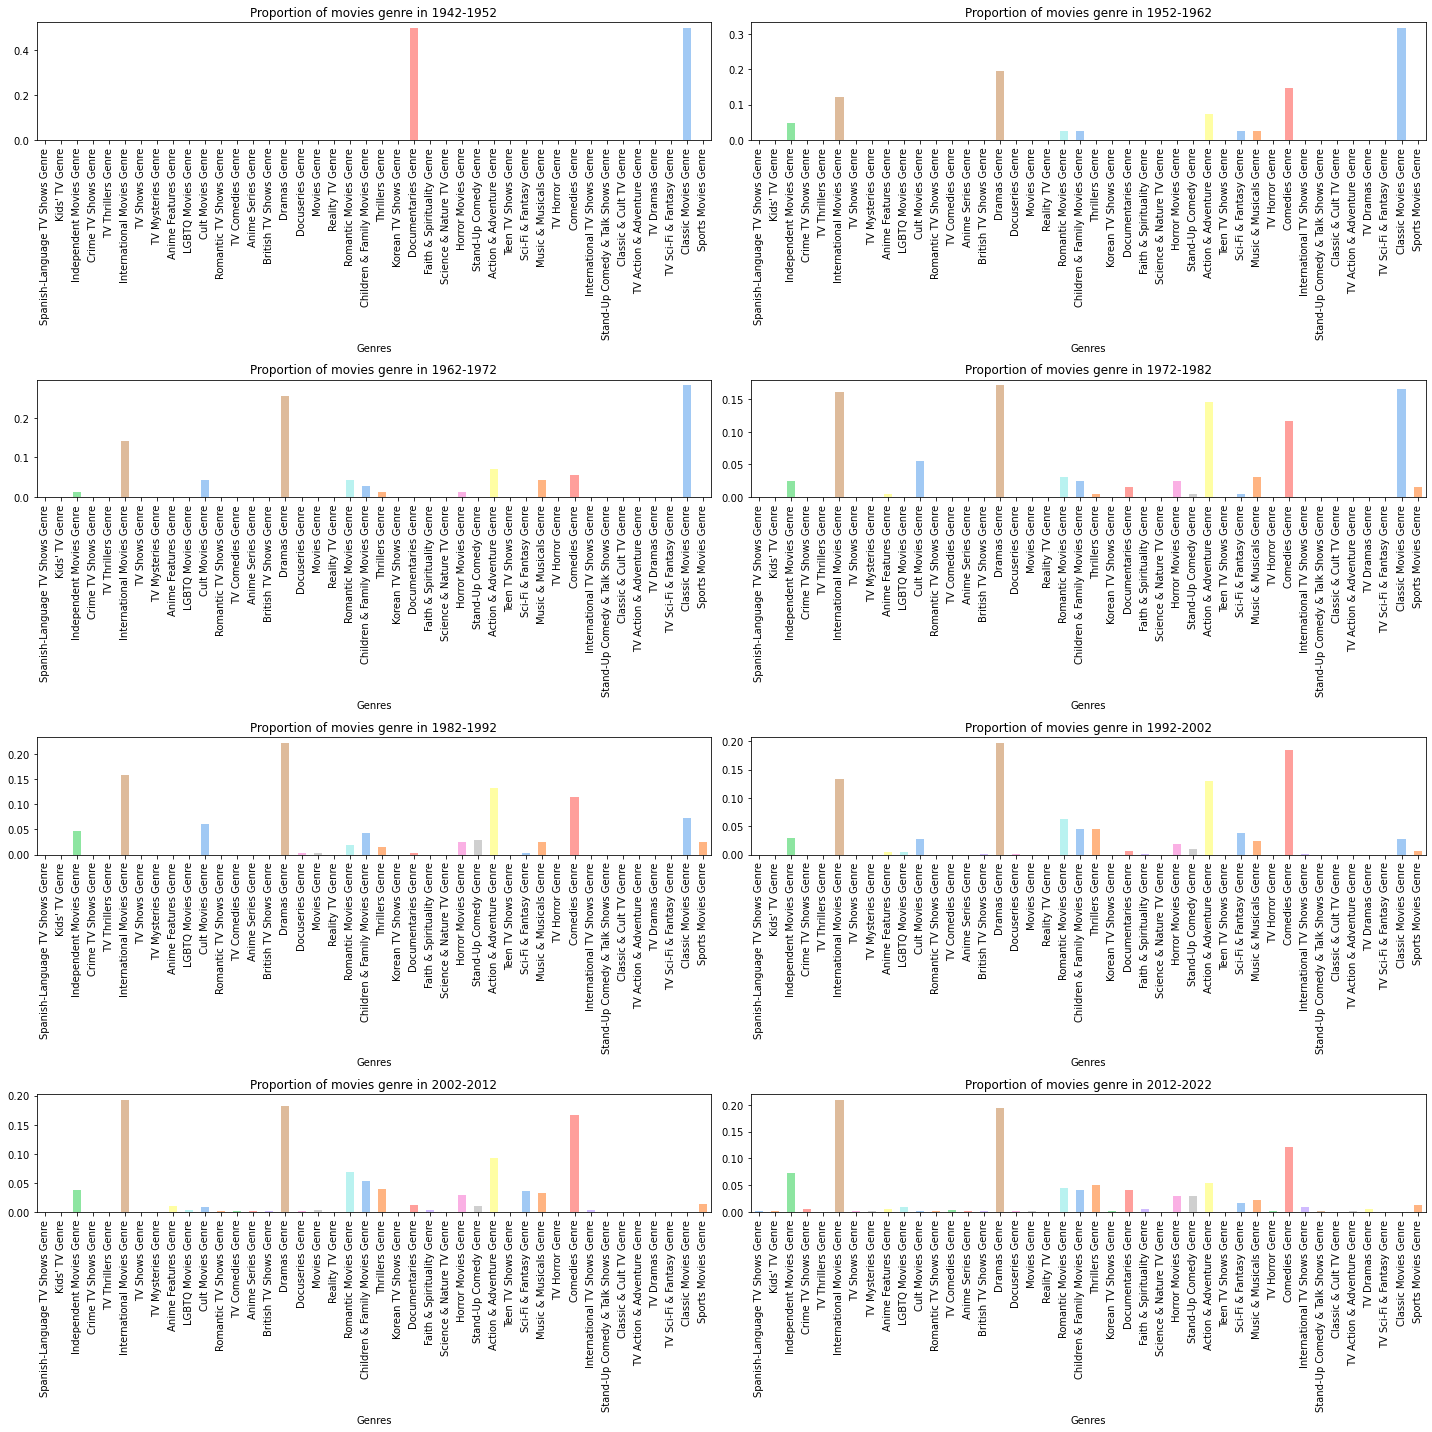

In [96]:
plt.figure(figsize= (20, 20))
plt.subplot(4,2,1)
df4['1942-1952'].plot.bar(color = colors)
plt.title('Proportion of movies genre in 1942-1952')
plt.subplot(4,2,2)
df4['1952-1962'].plot.bar(color = colors)
plt.title('Proportion of movies genre in 1952-1962')
plt.subplot(4,2,3)
df4['1962-1972'].plot.bar(color = colors)
plt.title('Proportion of movies genre in 1962-1972')
plt.subplot(4,2,4)
df4['1972-1982'].plot.bar(color = colors)
plt.title('Proportion of movies genre in 1972-1982')
plt.subplot(4,2,5)
df4['1982-1992'].plot.bar(color = colors)
plt.title('Proportion of movies genre in 1982-1992')
plt.subplot(4,2,6)
df4['1992-2002'].plot.bar(color = colors)
plt.title('Proportion of movies genre in 1992-2002')
plt.subplot(4,2,7)
df4['2002-2012'].plot.bar(color = colors)
plt.title('Proportion of movies genre in 2002-2012')
plt.tight_layout()
plt.subplot(4,2,8)
df4['2012-2022'].plot.bar(color = colors)
plt.title('Proportion of movies genre in 2012-2022')
plt.tight_layout()
plt.show()

### We can draw some conclusions of those bar plots

* more than 15% of movies released between 1942-1982 present on netflix belong to classic movies genre
* of those movies present on netflix at least the 15% of movies that were released 1952-2021 belong to dramas genre
* netflix's oldest tv show released between 1992-2002 and oldest lgtb movie on netflix also belong to that range of years

and so on...

## Now we'll analyse the year in that movies were added

In [148]:
ct2 = df2.groupby('year_added')[[g + ' Genre' for g in ge]].sum()
ct2 = ct2.reset_index()
ct2.head()

,year_added,Spanish-Language TV Shows Genre,Kids' TV Genre,Independent Movies Genre,Crime TV Shows Genre,TV Thrillers Genre,International Movies Genre,TV Shows Genre,TV Mysteries Genre,Anime Features Genre,...,TV Horror Genre,Comedies Genre,International TV Shows Genre,Stand-Up Comedy & Talk Shows Genre,Classic & Cult TV Genre,TV Action & Adventure Genre,TV Dramas Genre,TV Sci-Fi & Fantasy Genre,Classic Movies Genre,Sports Movies Genre
0,2008,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2009,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2010,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,2012,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0


In [149]:
total2 = ct2.sum(axis = 1)
total2 = total2.tolist()
ct2['Total'] = total2

### Number of movies added per year

<BarContainer object of 14 artists>

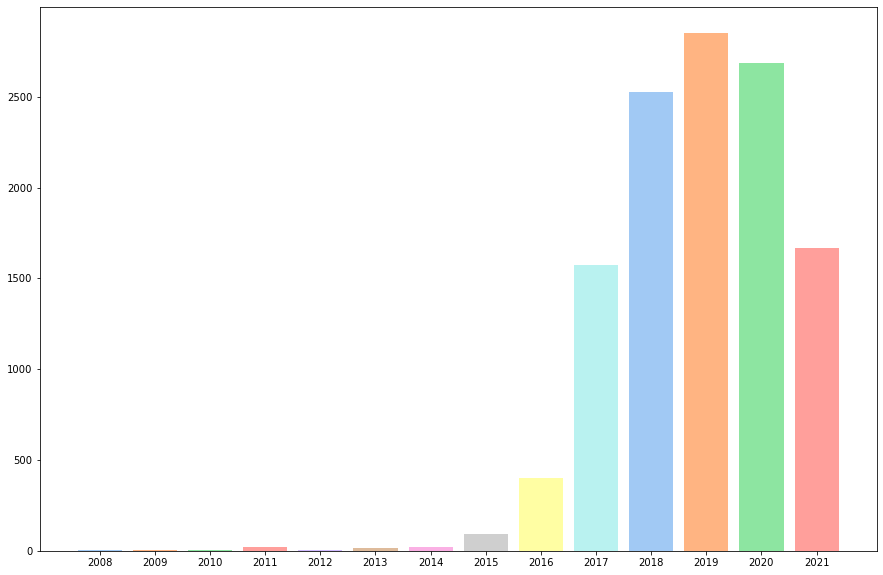

In [150]:
plt.figure(figsize = (15, 10))
plt.bar(ct2['year_added'], total2, color = colors)

In [151]:
# drawing the percentage of each movie genre por year
c = ct2.columns
c = c.delete(0)
for i in c:
    ct2[i] = ct2[i]/ct2['Total']
ct2.drop('Total', axis = 1, inplace = True)

In [153]:
ya1 = ct2.loc[0].values
ya1 = ya1.tolist()
ya1.pop(0)

ya2 = ct2.loc[1].values
ya2 = ya2.tolist()
ya2.pop(0)

ya3 = ct2.loc[2].values
ya3 = ya3.tolist()
ya3.pop(0)

ya4 = ct2.loc[3].values
ya4 = ya4.tolist()
ya4.pop(0)

ya5 = ct2.loc[4].values
ya5 = ya5.tolist()
ya5.pop(0)

ya6 = ct2.loc[5].values
ya6 = ya6.tolist()
ya6.pop(0)

ya7 = ct2.loc[6].values
ya7 = ya7.tolist()
ya7.pop(0)

ya8 = ct2.loc[7].values
ya8 = ya8.tolist()
ya8.pop(0)

ya9 = ct2.loc[8].values
ya9 = ya9.tolist()
ya9.pop(0)

ya10 = ct2.loc[9].values
ya10 = ya10.tolist()
ya10.pop(0)

ya11 = ct2.loc[10].values
ya11 = ya11.tolist()
ya11.pop(0)

ya12 = ct2.loc[11].values
ya12 = ya12.tolist()
ya12.pop(0)

ya13 = ct2.loc[12].values
ya13 = ya13.tolist()
ya13.pop(0)

ya14 = ct2.loc[13].values
ya14 = ya14.tolist()
ya14.pop(0)

'2021'

In [157]:
l = ct2['year_added'].values
l = l.tolist()
l

['2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021']

In [166]:
df5 = pd.DataFrame({'Genre': [g + ' Genre' for g in ge], '2008': ya1, '2009': ya2, '2010': ya3, '2011': ya4, '2012': ya5, '2013': ya6, '2014': ya7, '2015': ya8, '2016': ya9,
                   '2017': ya10, '2018': ya11, '2019': ya12, '2020': ya13, '2021': ya14})
df5 = df5.set_index('Genre')

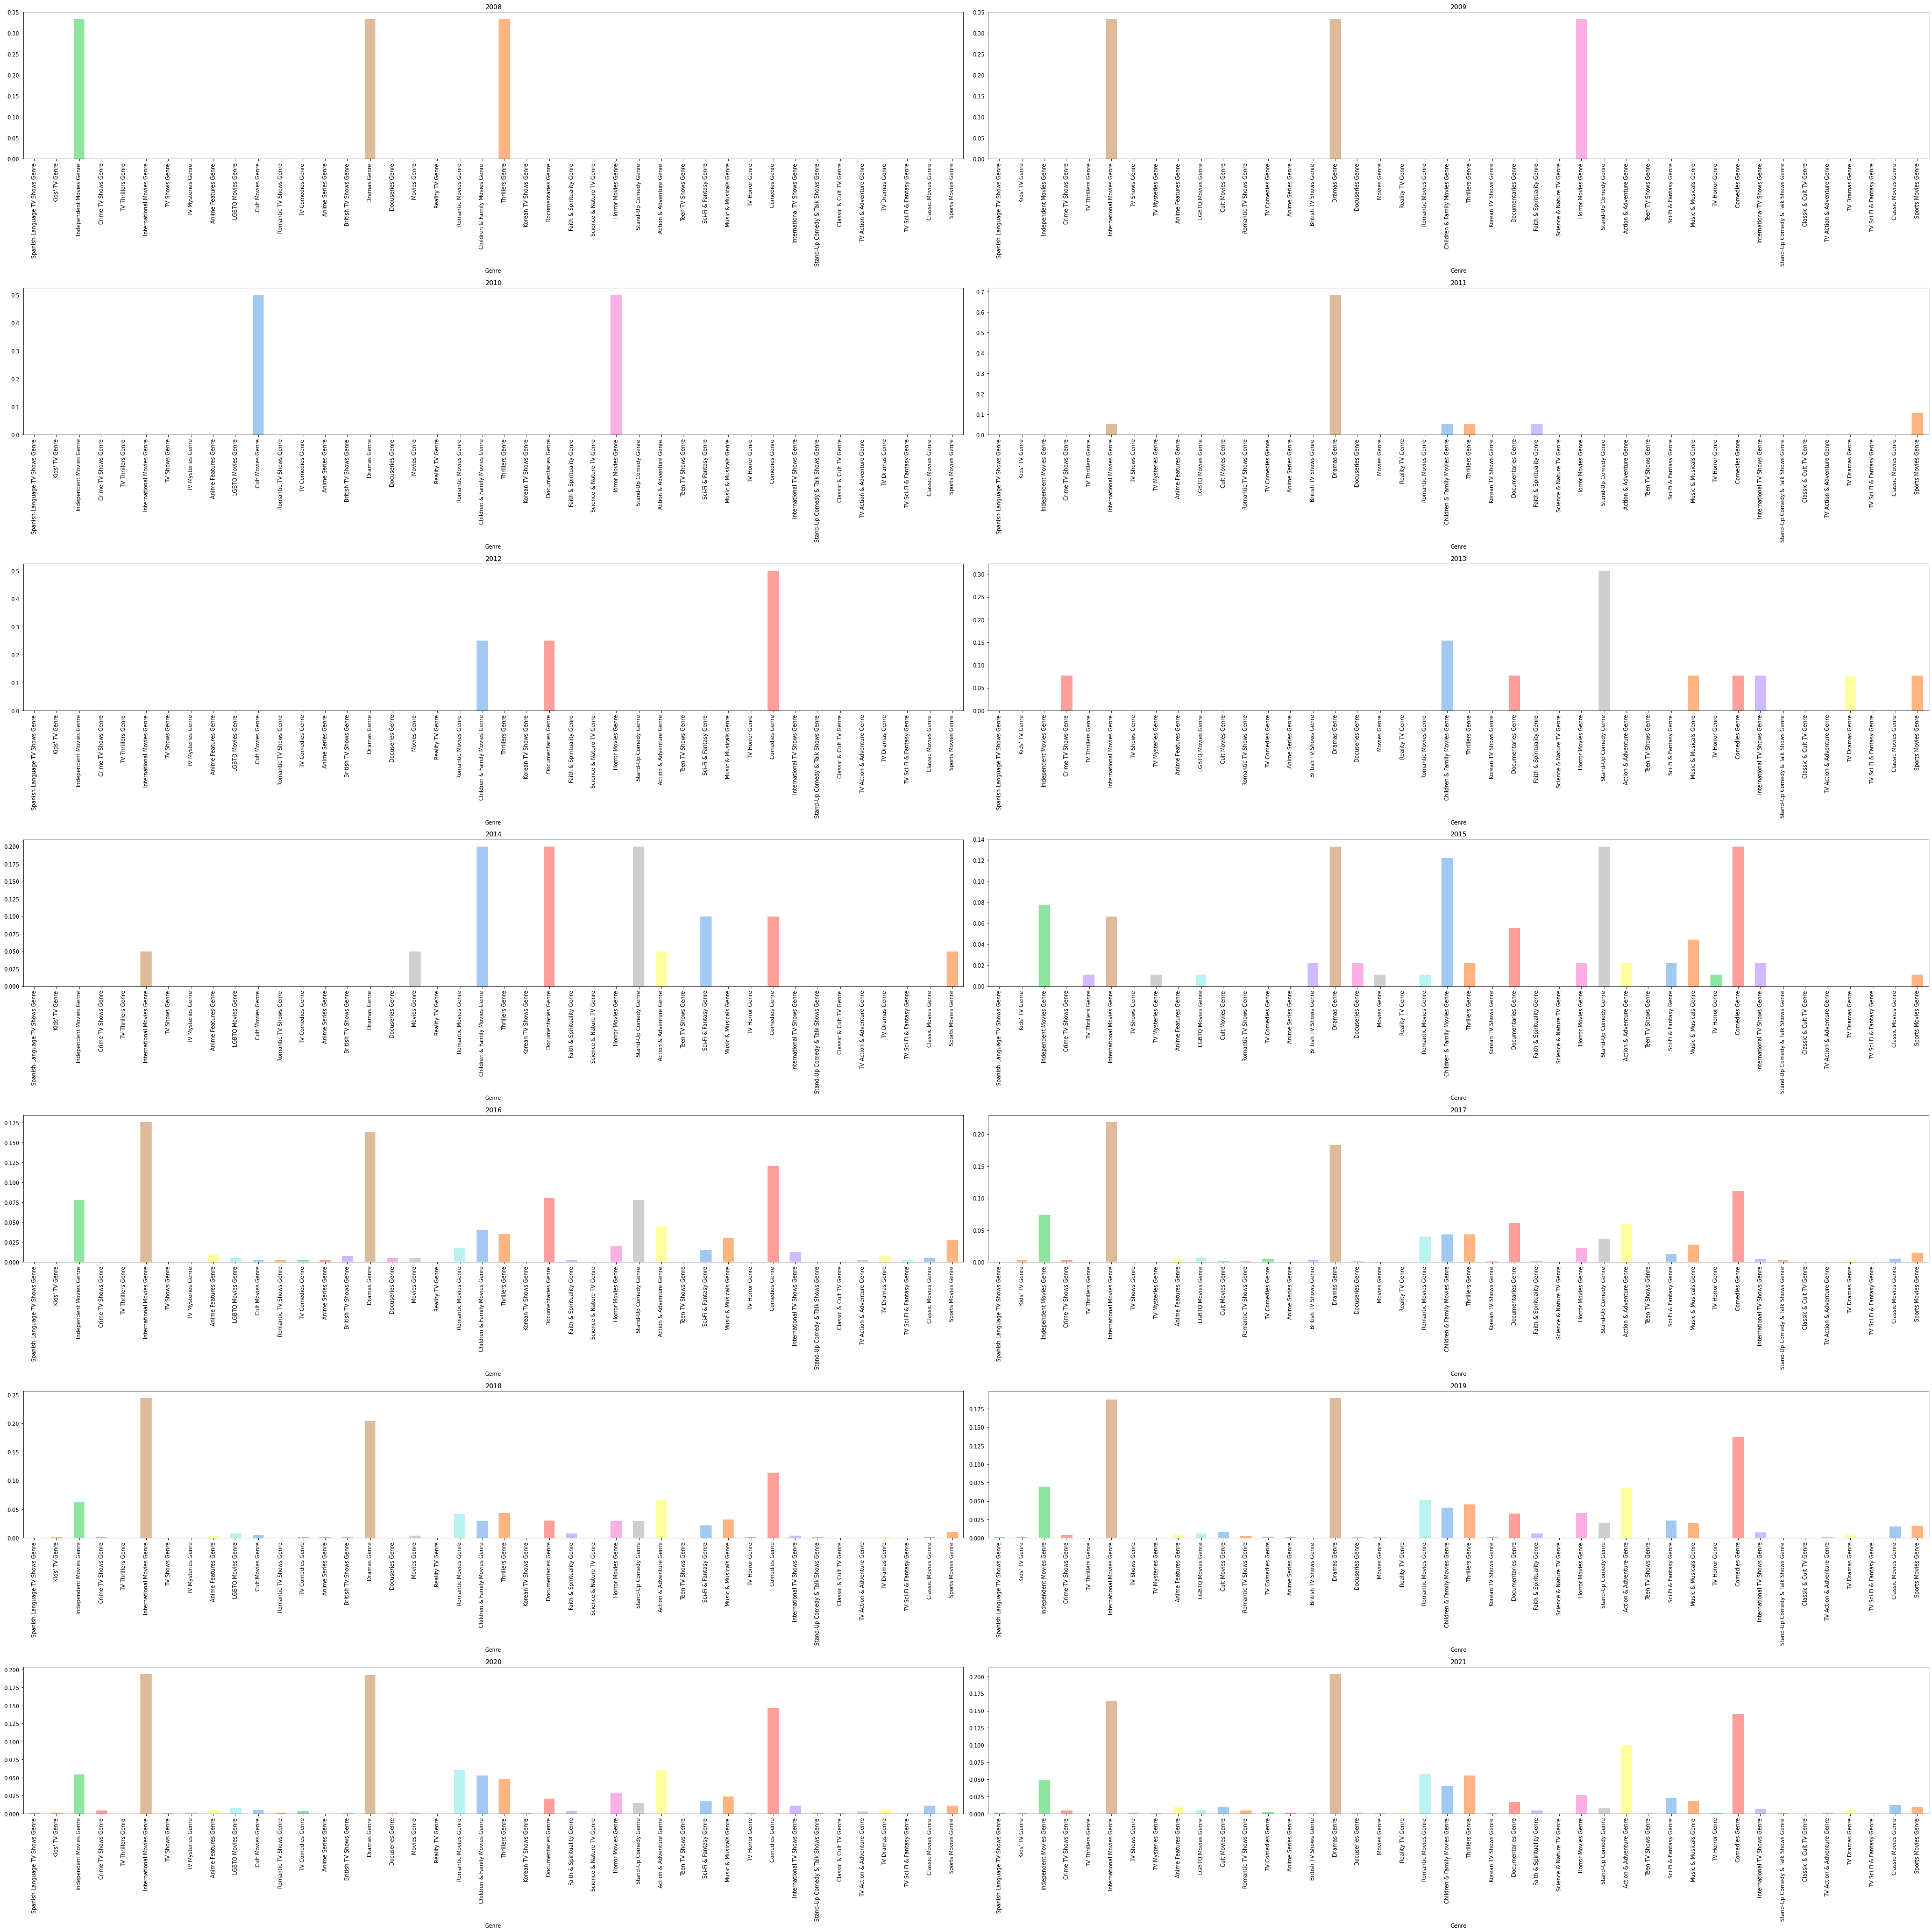

In [184]:
plt.figure(figsize = (50, 50))
plt.subplot(7,2,1)
df5['2008'].plot.bar(color = colors)
plt.title('2008')
plt.subplot(7,2,2)
df5['2009'].plot.bar(color = colors)
plt.title('2009')
plt.subplot(7,2,3)
df5['2010'].plot.bar(color = colors)
plt.title('2010')
plt.subplot(7,2,4)
df5['2011'].plot.bar(color = colors)
plt.title('2011')
plt.subplot(7,2,5)
df5['2012'].plot.bar(color = colors)
plt.title('2012')
plt.subplot(7,2,6)
df5['2013'].plot.bar(color = colors)
plt.title('2013')
plt.subplot(7,2,7)
df5['2014'].plot.bar(color = colors)
plt.title('2014')
plt.subplot(7,2,8)
df5['2015'].plot.bar(color = colors)
plt.title('2015')
plt.subplot(7,2,9)
df5['2016'].plot.bar(color = colors)
plt.title('2016')
plt.subplot(7,2,10)
df5['2017'].plot.bar(color = colors)
plt.title('2017')
plt.subplot(7,2,11)
df5['2018'].plot.bar(color = colors)
plt.title('2018')
plt.subplot(7,2,12)
df5['2019'].plot.bar(color = colors)
plt.title('2019')
plt.subplot(7,2,13)
df5['2020'].plot.bar(color = colors)
plt.title('2020')
plt.subplot(7,2,14)
df5['2021'].plot.bar(color = colors)
plt.title('2021')
plt.tight_layout()
plt.show()

## We can draw some conclusion of this bar plots

* Comedy, International and drama genres are the most added through the years
* The first tv show was added in 2013

## Let´s going to see what type of show have been more added

<AxesSubplot:>

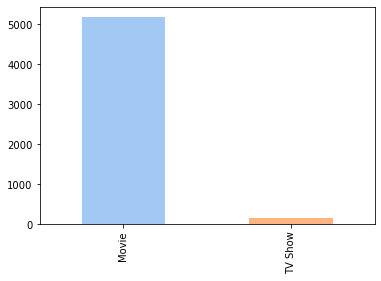

In [199]:
df2['type'].value_counts().plot.bar(color = colors)

In [209]:
tv = 147
mv = 5185
tvp = tv/len(df2)
mvp = mv/len(df2)
print('According to this data set: ')
print(f'In all these years the {round(mvp, 3)}% of all content has been movies and the other {round(tvp, 3)}% has been tv shows')

According to this data set: 
In all these years the 0.972% of all content has been movies and the other 0.028% has been tv shows
